<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Fri Jul 28 11:40:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.62       Driver Version: 462.62       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8     3W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
from argparse import ArgumentParser

parser = ArgumentParser(description="computer vision model argument")
parser.add_argument("--disable-cuda",  type=bool, default=False, help="Choose cuda device to train model?")
parser.add_argument("--learning-rate", "-lr", type=float, default=.01, help="Learning rate")
parser.add_argument("--epochs", "-e", type=int, default=40, help="Epochs")
parser.add_argument("--MODEL-PATH", type=str, default="../../Module/model", help="Model save path")
parser.add_argument('--file', '-f', type=str)
args = parser.parse_args()

args.device = None
if not args.disable_cuda and torch.cuda.is_available():
    args.device = "cuda"
else:
    args.device = 'cpu'


2.0.1+cu117


## 1. What are 3 areas in industry where computer vision is currently being used?

- Defect detection using Computer Vision.
- OCR using Computer vision.
- Crop Monitoring.
- Analysis of X-rays, MRI, and CT scans using Computer Vision.
- Road Condition Monitoring.
- 3D model Building using Computer vision.
- Cancer Detection using Computer Vision

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Early stopping. Early stopping pauses the training phase before the machine learning model learns the noise in the data. ...
- Pruning. You might identify several features or parameters that impact the final prediction when you build a model. ...
- Regularization. ...
- Ensembling. ...
- Data augmentation.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [19]:
from torchvision import datasets 
from torchvision.transforms import ToTensor


train_data = datasets.MNIST(root="data",
                            train=True,
                            transform=ToTensor(),
                            download=True,
                            target_transform=None)

test_data = datasets.MNIST(root="data",
                           train=False,
                           transform=ToTensor(),
                           download=True)

100%|██████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 14331297.83it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|███████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 3121088.68it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|███████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 6984210.95it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|█████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2518578.63it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [21]:
class_names = train_data.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.

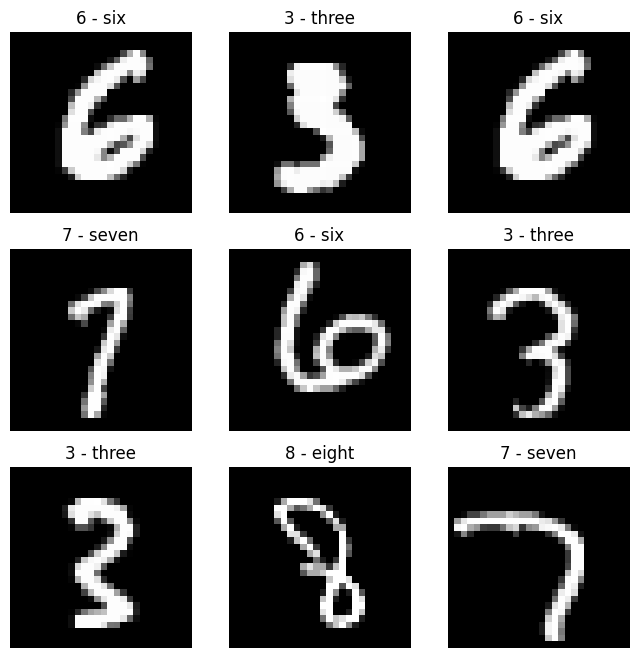

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(82)

fig, ax = plt.subplots(3, 3, figsize=(8,8))
ax = ax.flatten()
for i in range(3 * 3):
    axes = ax[i]
    random_num = np.random.randint(1000)
    image, label = test_data[random_num]
    axes.imshow(image.squeeze(), cmap="gray")
    axes.set_title(class_names[label])
    axes.axis(False)


In [41]:
image, _ =train_data[0]
print(f"Shape of an image {image.shape}\nShape of train data{train_data.data.shape}\nShape of test data{test_data.data.shape}")

Shape of an image torch.Size([1, 28, 28])
Shape of train datatorch.Size([60000, 28, 28])
Shape of test datatorch.Size([10000, 28, 28])


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [25]:
from torch.utils.data import DataLoader

batch_size=32

train_dataloader = DataLoader(train_data,
                              batch_size=batch_size,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=batch_size,
                              shuffle=True)



## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [26]:
import torch.nn as nn

In [36]:
class TinyVGG(nn.Module):
    def __init__(self, in_channels :int, out_classes: int, hidden_channels: int):
        super().__init__()
        self.maxpool = nn.MaxPool2d(2)
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels, hidden_channels, 3, padding="same"),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, hidden_channels, 3, padding="same"),
            nn.ReLU(),
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_channels, hidden_channels, 3, padding="same"),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, hidden_channels, 3, padding="same"),
            nn.ReLU(),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_channels * 7 * 7,
                      out_features=out_classes)
        )
        
    def forward(self, x):
        x = self.block_1(x) + x
        x = self.maxpool(x)
        x = self.block_2(x) + x
        x = self.maxpool(x)
        return self.classifier(x)
    
model_0 = TinyVGG(in_channels=1, out_classes=len(class_names), hidden_channels=10).to(args.device)
model_0

TinyVGG(
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [65]:
args.epochs = 5
args.epochs

def accuracy_fn(y_pred, y_true):
    return (y_pred == y_true).sum() / len(y_true)


def train_step(dataloader: torch.utils.data.DataLoader, 
               model: nn.Module,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer, 
               accuracy_fn,
               device: torch.device = args.device):
    model.train()
    total_loss, total_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        acc = accuracy_fn(y_pred=y_pred.argmax(dim = 1), y_true=y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss
        total_acc += acc
        
        if batch % 400 == 10:
            print(f"Trained {batch * len(X)}/{len(dataloader.dataset)}")
        
    total_loss /= len(dataloader)
    total_acc /= len(dataloader)
    
    print(f"Train loss: {total_loss:.4f} | Train accuracy {total_acc:.4f}")
    return {"Loss score": total_loss, "Accuracy score": total_acc}
    


def test_step(dataloader: torch.utils.data.DataLoader, 
               model: nn.Module,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device = args.device):
    model.eval()
    total_loss, total_acc = 0, 0
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            acc = accuracy_fn(y_pred=y_pred.argmax(dim=1), y_true=y)
            
            total_loss += loss
            total_acc += acc
        total_loss /= len(dataloader)
        total_acc /= len(dataloader)

    print(f"Test loss: {total_loss:.4f} | Test accuracy {total_acc:.4f}")
    return {"Loss score": total_loss, "Accuracy score": total_acc}   
            
            

In [66]:
loss_fn_v0 = nn.CrossEntropyLoss().to(args.device)

optimizer_v0 = torch.optim.SGD(params=model_0.parameters(), lr=args.learning_rate)

In [67]:
def print_train_time(start: float, end: float, device: torch.device = args.device):
    total_time = end - start
    print(f"Total time training on {device}: {total_time:.4f}")
    return total_time

In [68]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

epochs = args.epochs
start_train = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n-----------\n")
    
    train_step(dataloader=train_dataloader,
               model=model_0,
               loss_fn=loss_fn_v0,
               optimizer=optimizer_v0, 
               accuracy_fn=accuracy_fn)
    
    test_step(dataloader=test_dataloader,
               model=model_0,
               loss_fn=loss_fn_v0,
               accuracy_fn=accuracy_fn)

end_train = timer()

_ = print_train_time(start=start_train, end=end_train)

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
-----------

Trained 320/60000
Trained 13120/60000
Trained 25920/60000
Trained 38720/60000
Trained 51520/60000
Train loss: 0.1066 | Train accuracy 0.9674
Test loss: 0.0952 | Test accuracy 0.9685
Epochs: 1
-----------

Trained 320/60000
Trained 13120/60000
Trained 25920/60000
Trained 38720/60000
Trained 51520/60000
Train loss: 0.0889 | Train accuracy 0.9718
Test loss: 0.0683 | Test accuracy 0.9783
Epochs: 2
-----------

Trained 320/60000
Trained 13120/60000
Trained 25920/60000
Trained 38720/60000
Trained 51520/60000
Train loss: 0.0775 | Train accuracy 0.9755
Test loss: 0.0742 | Test accuracy 0.9747
Epochs: 3
-----------

Trained 320/60000
Trained 13120/60000
Trained 25920/60000
Trained 38720/60000
Trained 51520/60000
Train loss: 0.0704 | Train accuracy 0.9779
Test loss: 0.0617 | Test accuracy 0.9790
Epochs: 4
-----------

Trained 320/60000
Trained 13120/60000
Trained 25920/60000
Trained 38720/60000
Trained 51520/60000
Train loss: 0.0637 | Train accuracy 0.9801
Test loss: 0.060

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_prediction(model, images, true_label):
    model.eval()
    with torch.inference_mode():
        
        y_pred = model(images)
    

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?